<a href="https://colab.research.google.com/github/sid1336/Computational-physics/blob/main/Exercise%2010%20-%20Response%20theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Your name here__
<br>
Date: Mar. 20, 2024
<br>
PHYS 2030 W24

__Rubric__ (100 points total):

- Part (a) /__20 points__

- Part (b) /__20 points__

- Part (c) /__20 points__

- Part (d) /__20 points__

- Part (e) /__20 points__



# <center><font color=#46769B>Exercise 10: Linear response theory</font></center>

## <font color=#46769B>Introduction: Damped harmonic oscillator with a driving force</font>

A __driven damped harmonic oscillator__, with a driving force $F(t)$, is governed by the second-order ODE

$$y''(t) + \gamma y'(t) + \omega^2 y(t) = F(t) \, , \qquad (1)$$

where $\omega=1$ is the intrinsic angular frequency of the oscillator and $\gamma=0.3$ is the damping coefficient. We will take oscillator to be initially at rest at $t=0$, with initial condition

$$y(0) = 0 , \quad y'(0) = 0 \, .$$

The external driving force $F(t)$ will be zero at $t < 0$ and it will turn on for $t \ge 0$.

You can think of Eq. (1) as describing a generic system that starts off in equilibrium and then it gets perturbed by some external force. The goal of this exercise is to determine the *response* of the system, i.e., what is $y(t)$ for a given external force $F(t)$. We will take $F(t)$ to be a periodic function.

Here we will use our knowledge of solving ODEs to solve Eq. (1). We will also investigate how Fourier methods can be useful to solve Eq. (1) in the case that $F(t)$ is a periodic function.

The goals of this exercise are:

- Gain familiarity with Fourier series

- Practice with complex numbers in Python

- Review using `solve_ivp`

Required reading:

- *Lesson 10: Fourier Series*

## <font color=#46769B>Part (a): Driving force </font>

Consider a driving function that "turns on" for $t \ge 0$ and is given by a periodic triangular wave, shown here, with period $T=1$:

<div>
<img src="https://github.com/PHYS-2030-Computational-Methods/Lecture-notes/raw/main/figures/triangular_wave.PNG" width="400">
</div>

The functional form of the wave is to be determined by you from this plot. Assume that $F(t)$ is linear except at its minima and maxima, and that it repeats henceforth for $t > 0$.

Your tasks are:

- Define a function for $F(t)$ (using a `def` statement) corresponding to the driving force $F(t)$ shown above.

- Use your function to make the plot shown above using your own code.

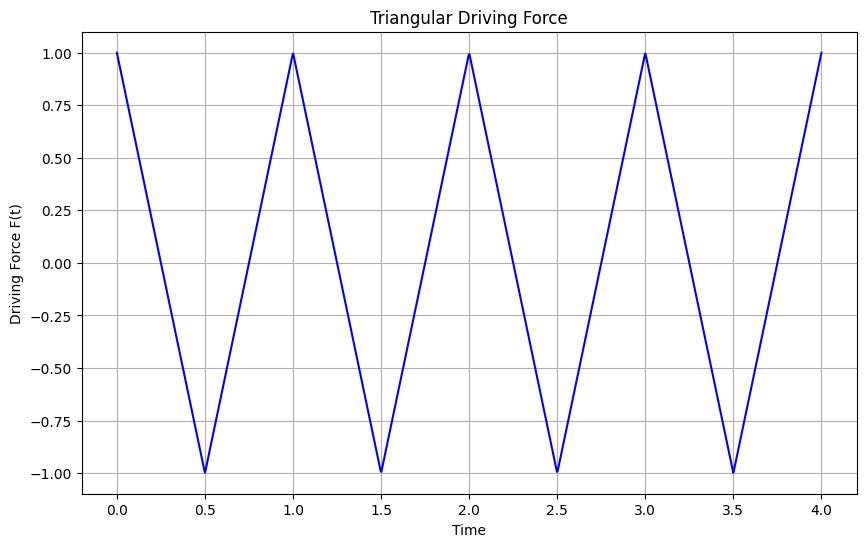

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def driving_force(t):
    T = 1  # Period of the triangular wave
    t = t % T  # Make t periodic with period T

    if t < T/2:
        return -4*t/T+1
    else:
        return -(4 - 4*t/T)+1

# Generate time values for plotting
t_values = np.linspace(0, 4, 1000)
# Calculate corresponding values of the driving force
F_values = [driving_force(t) for t in t_values]

# Plot the driving force
plt.figure(figsize=(10, 6))
plt.plot(t_values, F_values, color='blue')
plt.xlabel('Time')
plt.ylabel('Driving Force F(t)')
plt.title('Triangular Driving Force')
plt.grid(True)
plt.show()

## <font color=#46769B>Part (b): Fourier series </font>

Every (reasonably-behaved) periodic function can be expanded in terms of a Fourier series of sine and cosine functions. Here the period of $F(t)$ is $T=1$. The generic Fourier series formula with $T=1$ is

$$F(t) = a_0 + \sum_{k=1}^{\infty} \big( a_k \cos\left( \omega_k t \right) + b_k \sin\left( \omega_k t \right) \big) \qquad (2)$$

where $\omega_k = 2\pi k$ are the frequencies that enter here. According to the lecture notes, the Fourier coefficients can be computed by performing these integrals

$$a_0 = \int_0^1 dt \, F(t)$$

$$a_k = 2 \int_0^1 dt \, \cos(\omega_k t) \, F(t)$$

$$b_k = 2 \int_0^1 dt \, \sin(\omega_k t) \, F(t)$$

The Fourier coefficients for $F(t)$, given by the triangular wave shown above, are:

$$a_0 = 0 \, , \quad a_k = \left\{ \begin{array}{cc} \frac{8}{\pi^2 k^2} & {\rm for\; odd} \; k > 0 \\ 0 & {\rm for\; even} \; k > 0 \end{array} \right. , \quad b_k = 0 \, ,$$

which you can check by computing the integrals above.

Your tasks are:

- Compute and plot the Fourier series representation of $F(t)$ in Eq. (2) including Fourier modes with $k \le 1$.

- Do the same except with $k \le 3$.

- Do the same except with $k \le 15$.

- Put all Fourier series on the same plot along with your plot from Part (a) to show the agreement.

- Include a legend in your plot and only show one period on the $x$-axis.

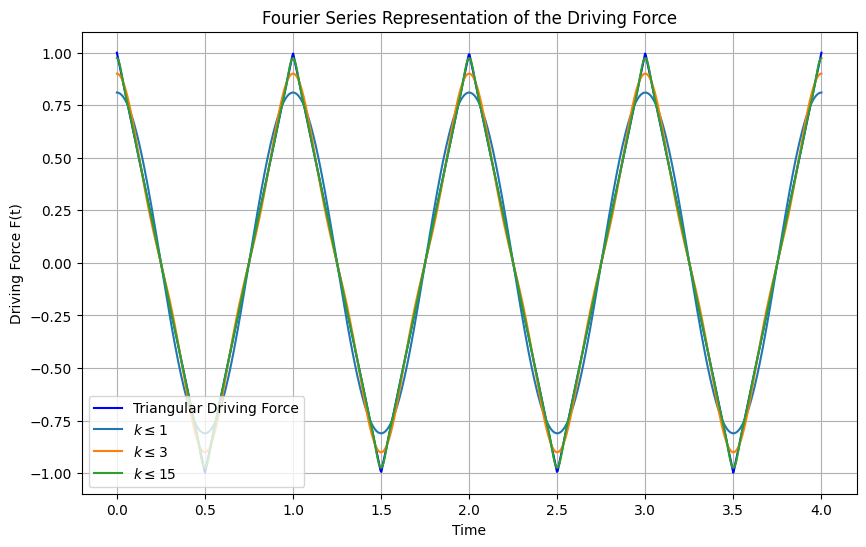

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Fourier coefficients based on the given formulas
def a_k(k):
    if k == 0:
        return 0
    elif k % 2 == 0:
        return 0
    elif k % 2 == 1:
        return 8  / (k**2* np.pi**2)

def b_k(k):
    return 0

# Define the Fourier series function
def Fourier_series(t, k_max):
    T = 1  # Period of the function
    f = np.zeros_like(t)
    for k in range(0, k_max + 1):
        f += a_k(k) * np.cos(2 * np.pi * k * t / T) + b_k(k) * np.sin(2 * np.pi * k * t / T)
    return f

# Define the driving force function
def driving_force(t):
    T = 1  # Period of the triangular wave
    t = t % T  # Make t periodic with period T

    if t < T/2:
        return -4*t/T + 1
    else:
        return -(4 - 4*t/T) + 1

# Generate time values for plotting
t_values = np.linspace(0, 4, 1000)

# Calculate corresponding values of the driving force
F_values = [driving_force(t) for t in t_values]

# Plot the driving force
plt.figure(figsize=(10, 6))
plt.plot(t_values, F_values, color='blue', label='Triangular Driving Force')

# Plot the Fourier series for different values of k_max
plt.plot(t_values, Fourier_series(t_values, 1), label=r'$k \leq 1$')
plt.plot(t_values, Fourier_series(t_values, 3), label=r'$k \leq 3$')
plt.plot(t_values, Fourier_series(t_values, 15), label=r'$k \leq 15$')

# Add labels, title, legend, and grid
plt.xlabel('Time')
plt.ylabel('Driving Force F(t)')
plt.title('Fourier Series Representation of the Driving Force')
plt.legend()
plt.grid(True)

plt.show()

## <font color=#46769B>Part (c): Alternative Fourier series </font>

An equivalent way of writing a Fourier series is in terms of complex exponentials. The generic Fourier series formula complex exponentials is (again with $T=1$)

$$F(t) = \sum_{k = -\infty}^{\infty} c_k  \, e^{i \omega_k t} \qquad (3)$$

where (as above) $\omega_k = 2\pi k$ are the frequencies that enter here. According to the lecture notes, the Fourier coefficients can be computed by performing these integrals

$$c_k = \int_0^1 dt \, e^{-i \omega_k t} \, F(t) \, , $$

or equivalently

$$\left. \begin{array}{c} c_k = \tfrac{1}{2} (a_k - i b_k) \\ c_{-k} = \tfrac{1}{2}  (a_k + i b_k) \end{array} \right\} \; k > 0$$

so if you know if you know $a_k$ and $b_k$, given in Part (b), you can convert to $c_k$.

Similar to Part (b), your tasks are:

- Compute and plot the __real part__ of the Fourier series representation of $F(t)$ in Eq. (3) including Fourier modes with $|k| \le 1$.

- Do the same except with $|k| \le 3$.

- Do the same except with $|k| \le 15$.

- Put all Fourier series on the same plot along with your plot from Part (a) to show the agreement.

- Include a legend in your plot and only show one period on the $x$-axis.

Next, on a separate plot, repeat these steps plotting the __imaginary part__ of the Fourier series representation of $F(t)$ in Eq. (3). Note that the $F(t)$ is a real function, so the imaginary part should be zero. This is a cross-check that the imaginary part of the Fourier series you compute should be zero (up to numerical accuracy).


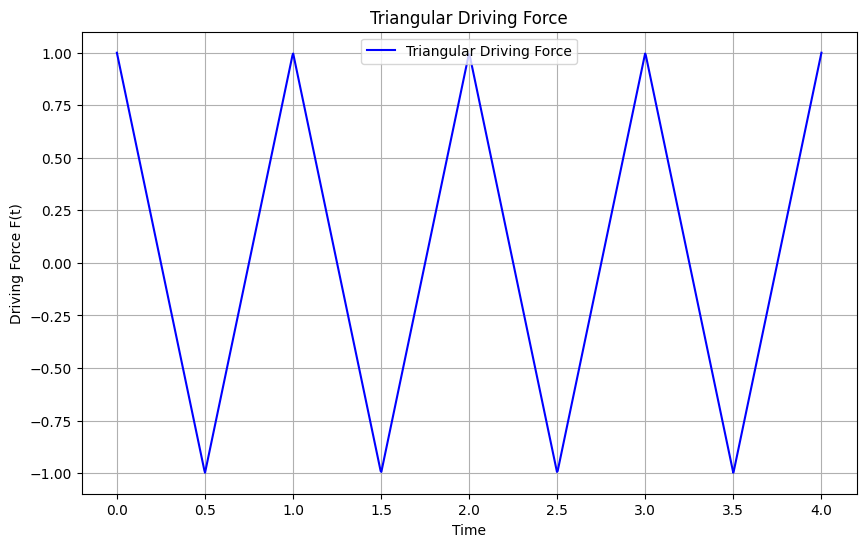

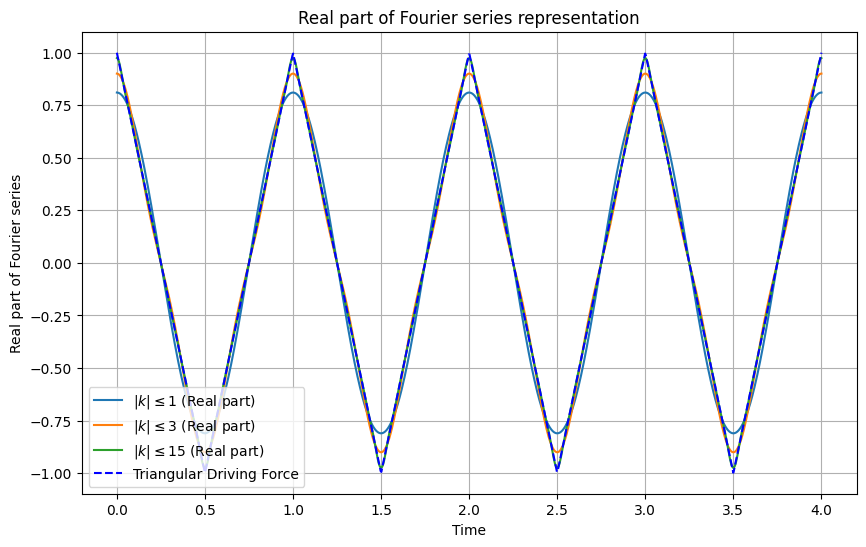

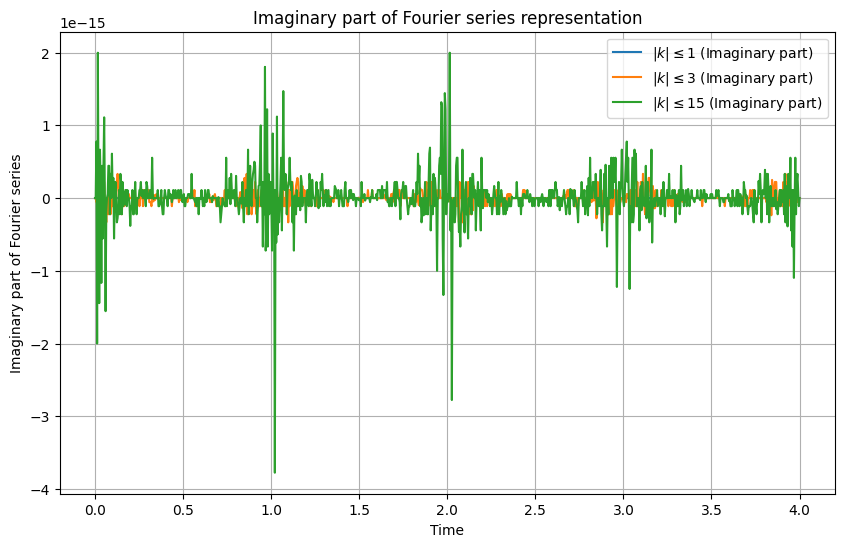

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Part (a) - Define the driving force function
def driving_force(t):
    T = 1  # Period of the triangular wave
    t = t % T  # Make t periodic with period T

    if t < T/2:
        return -4*t/T + 1
    else:
        return -(4 - 4*t/T) + 1

# Generate time values for plotting the driving force
t_values = np.linspace(0, 4, 1000)
# Calculate corresponding values of the driving force
F_values = [driving_force(t) for t in t_values]

# Plot the driving force
plt.figure(figsize=(10, 6))
plt.plot(t_values, F_values, color='blue', label='Triangular Driving Force')
plt.xlabel('Time')
plt.ylabel('Driving Force F(t)')
plt.title('Triangular Driving Force')
plt.grid(True)
plt.legend()
plt.show()

# Part (c) - Define the Fourier series function
def Fourier_coefficients(k):
    if k == 0:
        return 0
    elif k % 2 == 0:
        return 0
    elif k % 2 == 1:
        return 8  / (k**2* np.pi**2)

# Define the function to compute the real part of the Fourier series
def Fourier_real(t, k_max):
    T = 1  # Period of the function
    f = np.zeros_like(t)
    for k in range(0, k_max + 1):
        f += Fourier_coefficients(k) * np.cos(2 * np.pi * k * t / T)
    return f

# Define the function to compute the imaginary part of the Fourier series
def Fourier_imaginary(t, k_max):
    T = 1  # Period of the function
    f = np.zeros_like(t)
    for k in range(-k_max, k_max + 1):
        f +=  np.sin(2* np.pi * k * t / T)
    return f

# Plot the real part of the Fourier series for different values of k_max
plt.figure(figsize=(10, 6))
plt.plot(t_values, Fourier_real(t_values, 1), label=r'$|k| \leq 1$ (Real part)')
plt.plot(t_values, Fourier_real(t_values, 3), label=r'$|k| \leq 3$ (Real part)')
plt.plot(t_values, Fourier_real(t_values, 15), label=r'$|k| \leq 15$ (Real part)')

# Plot the original function F(t)
plt.plot(t_values, F_values, color='blue', linestyle='--', label='Triangular Driving Force')

# Add labels, title, legend, and grid
plt.xlabel('Time')
plt.ylabel('Real part of Fourier series')
plt.title('Real part of Fourier series representation')
plt.legend()
plt.grid(True)
plt.show()

# Plot the imaginary part of the Fourier series for different values of k_max
plt.figure(figsize=(10, 6))
plt.plot(t_values, Fourier_imaginary(t_values, 1), label=r'$|k| \leq 1$ (Imaginary part)')
plt.plot(t_values, Fourier_imaginary(t_values, 3), label=r'$|k| \leq 3$ (Imaginary part)')
plt.plot(t_values, Fourier_imaginary(t_values, 15), label=r'$|k| \leq 15$ (Imaginary part)')

# Add labels, title, legend, and grid
plt.xlabel('Time')
plt.ylabel('Imaginary part of Fourier series')
plt.title('Imaginary part of Fourier series representation')
plt.legend()
plt.grid(True)
plt.show()

## <font color=#46769B>Part (d): Damped harmonic oscillator</font>

Now we will return to the damped harmonic oscillator with a driving force.

Perform the following tasks:

- Write a code that will solve Eq. (1) numerically using `scipy.integrate.solve_ivp` over the range $[0,50]$ for $t$, using your driving force $F(t)$ in Part (a).

- Plot your solution for $y(t)$ as a function of $t$. Be sure to include a legend and axis labels. Also, change the size of the plot using `plt.figure(figsize=(12,4))` so that the oscillatory features are clear.

Hints for using `solve_ivp` (documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html)):

- The syntax for `solve_ivp` is
```py
sol = solve_ivp(f,[t0,tf],y0)
t = sol.t
y = sol.y
```
where `f` is $f(t,y)$, the function for the right-hand side of your ODE (one you right your ODE as a system of coupled first-order ODEs as in Runge-Kutta algorithms.

- `t` is the list of time points.

- `y` is the matrix of $(y_1,y_2)$ values, where $y_1 = y$ and $y_2 = y^\prime$, at each time step.

- Set the `t_eval=np.linspace(0,50,num=2000)` keyword so that you get a dense enough number of $t$ points out to make a nice plot.

- Set the keywords `atol=1e-6` and `rtol=1e-6` to increase the convergence tolerance settings in `solve_ivp` from their default values.


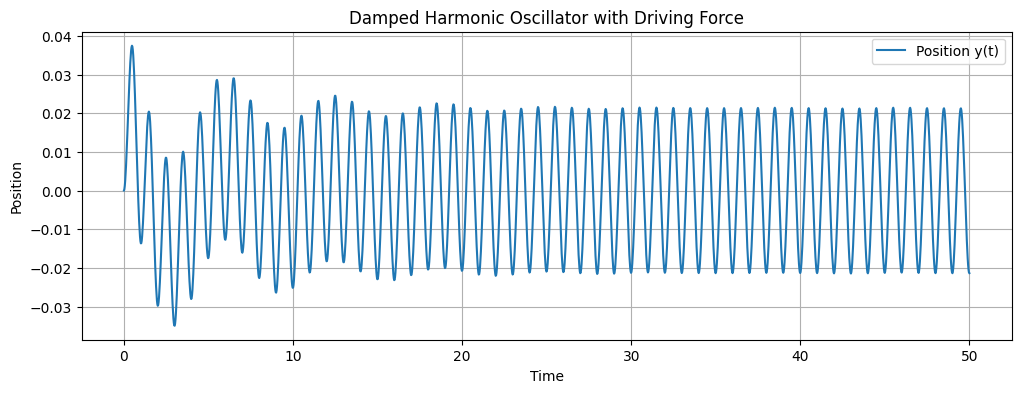

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the damped harmonic oscillator equation
def damped_harmonic_oscillator(t, y, gamma=0.3, omega=1):
    y_prime = y[1]  # y_prime = y'
    y_double_prime = -gamma * y[1] - omega**2 * y[0] + driving_force(t)
    return [y_prime, y_double_prime]

# Define the driving force function from Part (a)
def driving_force(t):
    T = 1  # Period of the triangular wave
    t = t % T  # Make t periodic with period T

    if t < T/2:
        return -4*t/T + 1
    else:
        return -(4 - 4*t/T) + 1

# Define the time range
t_span = [0, 50]

# Define the initial conditions
y0 = [0, 0]  # Initial position and velocity

# Solve the ODE numerically
sol = solve_ivp(damped_harmonic_oscillator, t_span, y0, t_eval=np.linspace(0, 50, num=2000), atol=1e-6, rtol=1e-6)

# Extract time and position values from the solution
t_values = sol.t
y_values = sol.y[0]

# Plot the solution
plt.figure(figsize=(12, 4))
plt.plot(t_values, y_values, label='Position y(t)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Damped Harmonic Oscillator with Driving Force')
plt.legend()
plt.grid(True)
plt.show()

## <font color=#46769B>Part (e): Linear response theory</font>

The main idea is:

> The response of the sum = The sum of the responses

The *response of the sum* means *the response of the system $y(t)$ to the total driving force applied $F(t)$*, i.e., what you calculated in Part (d).

Here we will calculate the same answer using a different method. The *sum of the responses* means:

- We will divide up the total force $F(t)$ into a sum of different Fourier modes, as in Part (c).

- We will calculate the response of the system to each Fourier mode by itself.

- The total response $y(t)$ is the sum of the individual responses.

The advantage here is that everything will be analytic and applies to *any* periodic function $F(t)$. As long as you can calculate the Fourier coefficients, you can solve the ODE analytically no matter how complicated $F(t)$ may be.

### <font color=#46769B>Derivation</font>

We saw in Parts (b) and (c) that we could divide up the driving force into a Fourier series. Here we will solve for the response of the system to each Fourier mode by itself. That is, we will solve the same ODE

$$y''(t) + \gamma y'(t) + \omega^2 y(t) = e^{i \omega_k t}$$

with the same parameters $\omega=1$ and $\gamma=0.3$. But we will replace the driving force with the Fourier mode (complex exponential), where $\omega_k = 2\pi k$, and for a given value of $k$ that is a positive or negative integer.

The advantage is that we can solve Eq. (4) analytically. The idea is:

- Guess the solution of the form $y(t) = A e^{i \omega_k t}$, where $A$ is a constant.

- Plug that into Eq. (4) and solve for the (complex) amplitude $A$.

We get

$$(\omega_k^2 + i \omega_k \gamma + \omega^2) A e^{i \omega_k t} = e^{i \omega_k t}$$

Solving for $A$ we get

$$A = \frac{1}{\omega_k^2 + i \omega_k \gamma + \omega^2}$$

Now the solution for $y$ is

$$y^{(k)}(t) = \frac{e^{i \omega_k t}}{\omega_k^2 + i \omega_k \gamma + \omega^2}$$

where we attach an extra label $(k)$ to the solution since it was the solution for a given Fourier mode $k$.

Next, we can build the total response by adding up the individual responses to each Fourier mode:

$$y(t) = \sum_k c_k y^{(k)}(t) = \sum_k \frac{c_k e^{i \omega_k t}}{\omega_k^2 + i \omega_k \gamma + \omega^2} \qquad (4)$$

where $c_k$ are  *the same Fourier coefficients* you calculated for $F(t)$ in Part (c).

There are two limitations here:

- The method here only applies to *linear* ODEs.

- The method only gives the *late-time behavior* of the solution. The reason is that the Fourier series solution assumes that $F(t)$ is periodic, whereas we are assuming it "turns-on" at $t=0$ which breaks the periodicity. So, there will be an initial transient phase not described by the Fourier solution, which then decays away, and then the solution will agree with the Fourier series solution.

### <font color=#46769B>Tasks</font>

Your tasks are as follows:

- Plot the Fourier Series solution for the real part of $y(t)$ given in Eq. (4), over the range $[0,50]$, including Fourier modes with $|k| \le 15$. On the same plot, show your numerical solution from Part (d). Include a legend and axis labels in your plot. Use the same `figsize` keyword as in Part (d).

- Make a separate plot for the imaginary part of $y(t)$ in Eq. (4), over the range $[0,50]$, including Fourier modes with $|k| \le 15$. This should be zero if you have done things correctly and is a good cross-check.


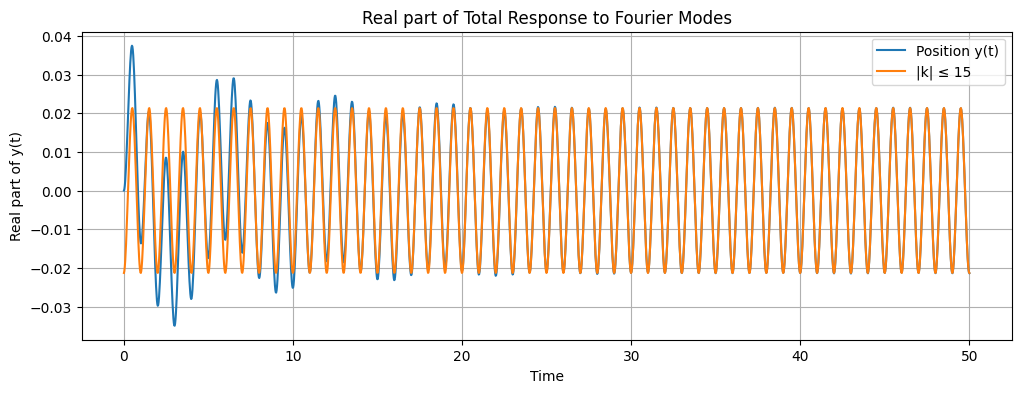

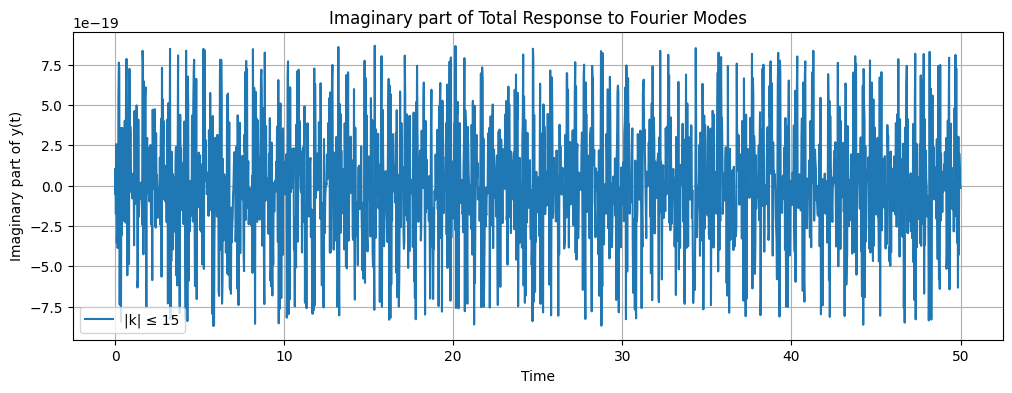

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
gamma = 0.3
omega = 1
T = 1  # Period of the triangular wave

# Define the Fourier coefficients from Part (b)
def a_k(k):
    if k == 0:
        return 0
    elif k % 2 == 0:
        return 0
    else:
        return 8  / (np.pi**2 * k**2)

def b_k(k):
    return 0

# Define the complex Fourier coefficient c_k
def c_k(k):
    return 0.5 * (a_k(k) - 1j * b_k(k))

# Define the Fourier series solution for each mode
def y_k(t, k):
    omega_k = 2 * np.pi * k
    A_k = 1 / (-omega_k**2 + 1j * gamma * omega_k + omega**2)
    return c_k(k) * np.exp(1j * omega_k * t) * A_k

# Define the total response as the sum of individual responses
def total_response(t, k_max):
    y_total = np.zeros_like(t, dtype=np.complex128)
    for k in range(-k_max, k_max + 1):
        y_total += y_k(t, k)
    return np.real(y_total), np.imag(y_total)

# Generate time values for plotting
t_values = np.linspace(0, 50, num=2000)

# Plot the real part of the total response
plt.figure(figsize=(12, 4))
plt.plot(t_values, y_values, label='Position y(t)')
for k_max in [15]:
    y_real, y_imag = total_response(t_values, k_max)
    plt.plot(t_values, y_real, label=f'|k| ≤ {k_max}')
plt.xlabel('Time')
plt.ylabel('Real part of y(t)')
plt.title('Real part of Total Response to Fourier Modes')
plt.legend()
plt.grid(True)
plt.show()

# Plot the imaginary part of the total response
plt.figure(figsize=(12, 4))
for k_max in [15]:
    y_real, y_imag = total_response(t_values, k_max)
    plt.plot(t_values, y_imag, label=f'|k| ≤ {k_max}')
plt.xlabel('Time')
plt.ylabel('Imaginary part of y(t)')
plt.title('Imaginary part of Total Response to Fourier Modes')
plt.legend()
plt.grid(True)
plt.show()